In [ ]:
!pip install pysus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 13.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/

In [ ]:
from pysus.ftp.databases.sinan import SINAN

sinan = SINAN().load()

In [ ]:
cols = [
    'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'ID_MUNICIP',
    'DT_SIN_PRI', 'SEM_PRI', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT',
    'latitude', 'longitude',
    'NM_DISEASE'
]
casos = sinan.download(sinan.get_files('DENG', 2022)).to_dataframe()

DENGBR22.parquet: 100%|██████████| 2.27M/2.27M [03:59<00:00, 9.48kB/s]


In [ ]:
casos

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,2022-01-09,202202,2022,35,353550,1338,2082519,2022-01-08,...,,,,,2,,20220111,,,
1,2,A90,2022-03-29,202213,2022,35,350170,1337,7114680,2022-03-28,...,,,,,2,,20220330,,,
2,2,A90,2022-01-06,202201,2022,35,350810,1336,2079461,2022-01-05,...,,,,,2,,20220107,,,
3,2,A90,2022-01-09,202202,2022,35,350810,1336,2079461,2022-01-08,...,,,,,2,,20220111,,,
4,2,A90,2022-01-08,202201,2022,35,353500,1354,2038404,2022-01-08,...,,,,,2,,20220110,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393872,2,A90,2022-04-05,202214,2022,51,510310,1590,6426778,2022-04-01,...,,,,,2,,20220413,,,
1393873,2,A90,2022-03-24,202212,2022,51,510270,1590,7768400,2022-03-23,...,,,,,2,,20220324,,,
1393874,2,A90,2022-04-18,202216,2022,51,510675,1591,7678207,2022-04-14,...,,,,,2,,20220420,,,
1393875,2,A90,2022-04-16,202215,2022,51,510792,1584,6975402,2022-04-10,...,,,,,2,,20220426,,,


In [ ]:
import pandas as pd
casos['DT_INDEX'] = pd.to_datetime(casos.DT_NOTIFIC)

In [ ]:
casos = casos.set_index('DT_INDEX')

<Axes: xlabel='DT_INDEX'>

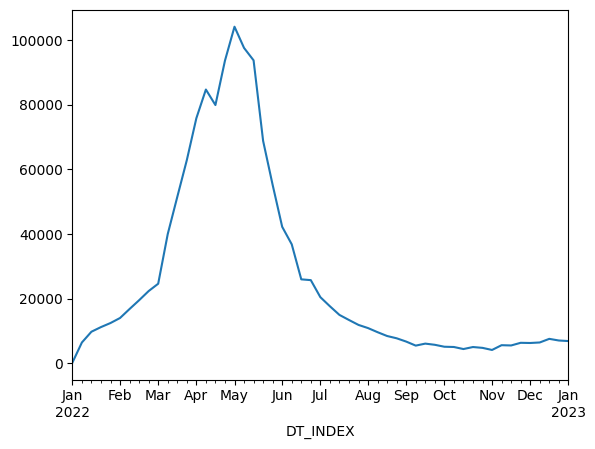

In [ ]:
casos.ID_AGRAVO.resample('1W').count().plot()

<Axes: xlabel='DT_INDEX'>

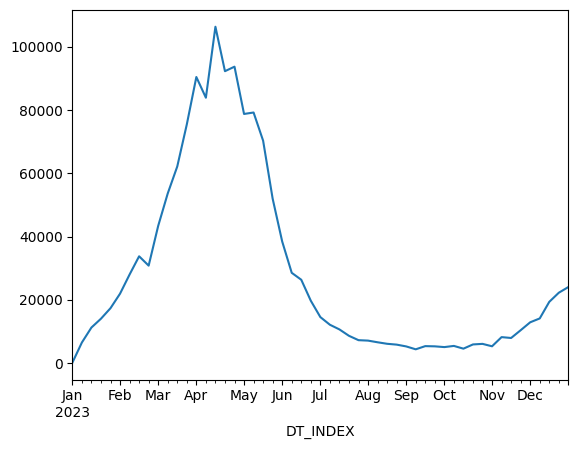

In [ ]:
casos.ID_AGRAVO.resample('1W').count().plot()